In [190]:
# Question 1.1

In [191]:
%matplotlib inline

In [192]:
# Libraries
import cv2
import numpy as np
import matplotlib.image
import matplotlib.pyplot as plt
from collections import defaultdict
import random
import math
import time
from scipy.spatial.distance import cdist
from scipy import misc
import warnings

In [193]:
def process_image(path):
    img = plt.imread(path)
    plt.imshow(img)
    processed_img = np.reshape(img,(-1,3))
    return processed_img

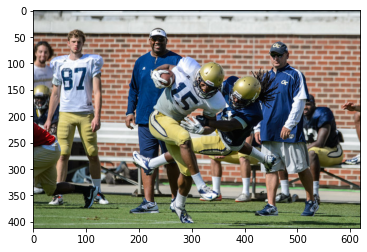

In [194]:
# Set variables
path = 'data/football.bmp'
pixels = process_image(path)

In [195]:
def k_means_algo(pixels, k):
    
    time_start = time.time()
    assignments = []
    count_dict = defaultdict(int)
    r_dict = defaultdict(int)
    g_dict = defaultdict(int)
    b_dict = defaultdict(int)
    done = 1
    count = 0
    
    # INITIAL CENTER ASSIGNMENT
    def center_assignment(k):
        centroids = np.random.randint(255, size=(k,3))
        return centroids
    
    centroids = center_assignment(k)
    
    # LOOP
    while(done):
        count += 1
        
        # CENTER ASSIGNMENT       
        distances = cdist(pixels, centroids, "euclidean") # use 'cityblock' for Manhattan Distance
        while(np.any(np.isnan(distances))):
            k -= 1
            centroids = center_assignment(k)
            distances = cdist(pixels, centroids, "euclidean")
        assignments = np.array([np.argmin(i) for i in distances])
        
        
        # CENTER ADJUSTMENT
        cent_list = []
        for i in range(k):
            # Set new centroids to the mean of each group
            temporary_centroids = np.round(pixels[assignments==i].mean(axis=0),decimals=0)                
            cent_list.append(temporary_centroids)
        
        new_centroids = np.vstack(cent_list)
        
        if(np.array_equal(new_centroids,centroids)):
            done = 0
            break
        else:
            centroids = new_centroids
     
    time_end = time.time()
    total_time = time_end - time_start
    
    print("Total Time:")
    print(total_time)
    
    print("Number of Centroids:")
    print(len(centroids))
    
    print("Centroids:")
    print(centroids)
    
    print("Number of Iterations: ")
    print(count)
    
    return(assignments, centroids)

In [196]:
def compress_image(centroids, assignments, path):
    img = plt.imread(path)
    new_img = centroids[assignments.astype(int),:]
    new_image = np.reshape(new_img, (img.shape[0],img.shape[1],img.shape[2]))
    new_image = new_image.astype(int)
    plt.imshow(new_image)
    # plt.imsave('compressed_image.bmp', new_image)

Total Time:
5.535492897033691
Number of Centroids:
2
Centroids:
[[ 75.  76.  67.]
 [190. 183. 173.]]
Number of Iterations: 
8


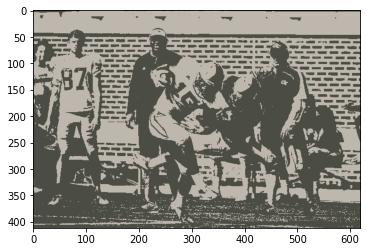

In [197]:
assignments, centroids = k_means_algo(pixels,2)
compress_image(centroids, assignments, path)

Total Time:
6.278589963912964
Number of Centroids:
4
Centroids:
[[213. 217. 220.]
 [121. 116.  93.]
 [ 36.  42.  46.]
 [182. 167. 149.]]
Number of Iterations: 
9


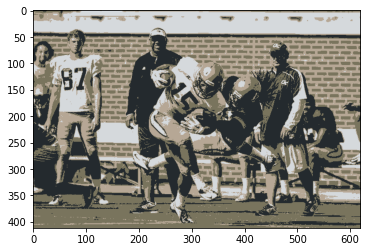

In [198]:
assignments, centroids = k_means_algo(pixels,4)
compress_image(centroids, assignments, path)

Total Time:
7.8608410358428955
Number of Centroids:
8
Centroids:
[[126. 138. 147.]
 [164. 116.  91.]
 [ 25.  64. 116.]
 [ 74.  71.  54.]
 [214. 219. 223.]
 [190. 174. 155.]
 [113. 127.  89.]
 [ 24.  25.  24.]]
Number of Iterations: 
11


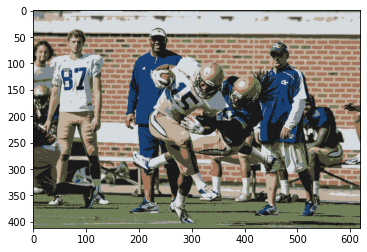

In [199]:
assignments, centroids = k_means_algo(pixels,8)
compress_image(centroids, assignments, path)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: Mean of empty slice.


Total Time:
33.46100687980652
Number of Centroids:
10
Centroids:
[[ 98. 103.  80.]
 [ 63.  61.  44.]
 [119. 133. 146.]
 [185. 161. 134.]
 [191. 187. 180.]
 [218. 223. 227.]
 [144. 125.  90.]
 [ 23.  63. 116.]
 [ 20.  22.  23.]
 [115.  20.  21.]]
Number of Iterations: 
47


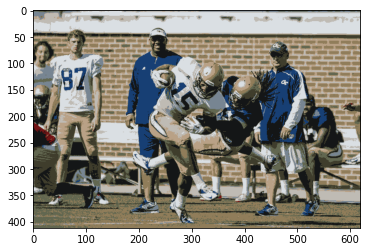

In [200]:
assignments, centroids = k_means_algo(pixels,16)
compress_image(centroids, assignments, path)

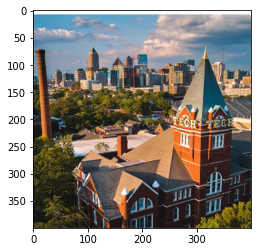

In [201]:
path = 'data/GeorgiaTech.bmp'
pixels = process_image(path)

Total Time:
1.7793452739715576
Number of Centroids:
2
Centroids:
[[172. 161. 153.]
 [ 60.  56.  46.]]
Number of Iterations: 
4


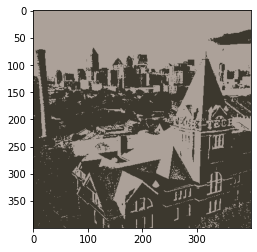

In [202]:
assignments, centroids = k_means_algo(pixels,2)
compress_image(centroids, assignments, path)

Total Time:
5.248859167098999
Number of Centroids:
4
Centroids:
[[209. 144.  91.]
 [ 99.  97.  85.]
 [167. 175. 184.]
 [ 43.  40.  34.]]
Number of Iterations: 
12


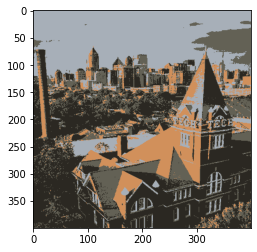

In [203]:
assignments, centroids = k_means_algo(pixels,4)
compress_image(centroids, assignments, path)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: Mean of empty slice.


Total Time:
10.26270079612732
Number of Centroids:
6
Centroids:
[[231. 211. 198.]
 [120.  95.  52.]
 [ 41.  36.  29.]
 [ 65.  82.  93.]
 [132. 155. 175.]
 [210. 147.  96.]]
Number of Iterations: 
22


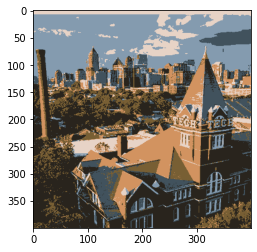

In [204]:
assignments, centroids = k_means_algo(pixels,8)
compress_image(centroids, assignments, path)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: Mean of empty slice.


Total Time:
14.909003019332886
Number of Centroids:
11
Centroids:
[[222. 193. 174.]
 [ 86.  71.  33.]
 [254. 251. 246.]
 [ 43.  61.  71.]
 [ 86.  97. 106.]
 [ 37.  30.  25.]
 [139. 107.  62.]
 [234. 119.  45.]
 [155. 164. 178.]
 [105. 146. 174.]
 [204. 156. 112.]]
Number of Iterations: 
32


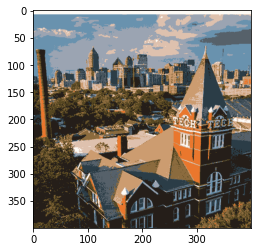

In [205]:
assignments, centroids = k_means_algo(pixels,16)
compress_image(centroids, assignments, path)

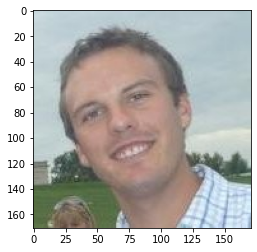

In [206]:
path = 'data/tom.bmp'
pixels = process_image(path)

Total Time:
0.8692648410797119
Number of Centroids:
2
Centroids:
[[122. 190. 123.]
 [204. 182. 204.]]
Number of Iterations: 
8


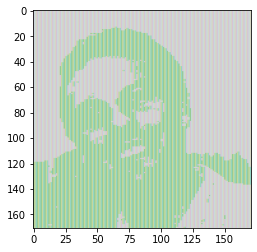

In [207]:
assignments, centroids = k_means_algo(pixels,2)
compress_image(centroids, assignments, path)

Total Time:
2.730175018310547
Number of Centroids:
4
Centroids:
[[127. 116. 255.]
 [191. 127. 117.]
 [218. 213. 211.]
 [116. 255. 143.]]
Number of Iterations: 
25


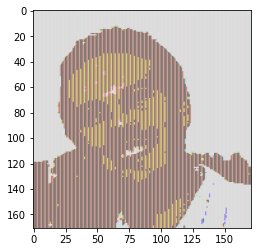

In [208]:
assignments, centroids = k_means_algo(pixels,4)
compress_image(centroids, assignments, path)

Total Time:
1.6972377300262451
Number of Centroids:
8
Centroids:
[[ 99. 102.  87.]
 [255. 188. 189.]
 [103.  89. 255.]
 [113. 255. 139.]
 [169. 143. 134.]
 [144. 135. 255.]
 [201. 225. 218.]
 [255. 123. 115.]]
Number of Iterations: 
15


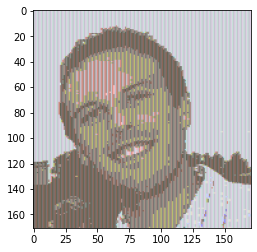

In [209]:
assignments, centroids = k_means_algo(pixels,8)
compress_image(centroids, assignments, path)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: Mean of empty slice.


Total Time:
2.216083288192749
Number of Centroids:
10
Centroids:
[[206. 212. 253.]
 [ 98.  81. 255.]
 [ 99. 102.  87.]
 [126. 118. 255.]
 [255. 124. 116.]
 [153. 143. 255.]
 [255. 188. 190.]
 [169. 143. 133.]
 [110. 255. 135.]
 [195. 233. 197.]]
Number of Iterations: 
19


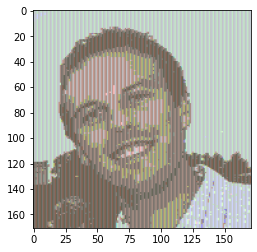

In [210]:
assignments, centroids = k_means_algo(pixels,16)
compress_image(centroids, assignments, path)

In [211]:
# Question 1.2

Since Question 1.1 serves as a test of a random initialization of centroids. Here I will test a "poor" initialization of centroids: assigning a color very close to black (0,0,0) or white (255,255,255). This will force high distance values initially.

In [212]:
def k_means_algo_poor_initialization(pixels, k):
    
    time_start = time.time()
    assignments = []
    done = 1
    count = 0
    
    # INITIAL CENTER ASSIGNMENT
    def center_assignment(k):
        choice = random.randint(0,1)
        if(choice == 0):
            centroids = np.random.randint(0,5,size=(k,3))
        else:
            centroids = np.random.randint(250,255,size=(k,3))
        return centroids
    
    centroids = center_assignment(k)
    
    # LOOP
    while(done):
        count += 1
        
        # CENTER ASSIGNMENT       
        distances = cdist(pixels, centroids, "euclidean") # use 'cityblock' for Manhattan Distance
        while(np.any(np.isnan(distances))):
            k -= 1
            centroids = center_assignment(k)
            distances = cdist(pixels, centroids, "euclidean")
        assignments = np.array([np.argmin(i) for i in distances])
        
        
        
        # CENTER ADJUSTMENT
        cent_list = []
        for i in range(k):
            # Set new centroids to the mean of each group
            temporary_centroids = np.round(pixels[assignments==i].mean(axis=0),decimals=0)                
            cent_list.append(temporary_centroids)
        
        new_centroids = np.vstack(cent_list)
        
        if(np.array_equal(new_centroids,centroids)):
            done = 0
            break
        else:
            centroids = new_centroids
     
    time_end = time.time()
    total_time = time_end - time_start
    
    print("Total Time:")
    print(total_time)
    
    print("Number of Centroids:")
    print(len(centroids))
    
    print("Centroids:")
    print(centroids)
    
    print("Number of Iterations: ")
    print(count)
    
    return(assignments, centroids)

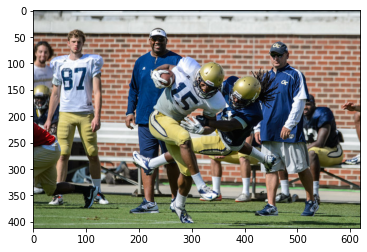

In [213]:
path = 'data/football.bmp'
pixels = process_image(path)

Total Time:
8.259207248687744
Number of Centroids:
2
Centroids:
[[ 74.  76.  66.]
 [190. 182. 172.]]
Number of Iterations: 
12


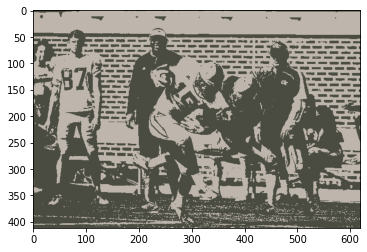

In [214]:
assignments, centroids = k_means_algo_poor_initialization(pixels, 2)
compress_image(centroids, assignments, path)

Total Time:
11.021322965621948
Number of Centroids:
4
Centroids:
[[205. 203. 198.]
 [ 70.  82.  84.]
 [148. 135. 109.]
 [ 29.  30.  29.]]
Number of Iterations: 
16


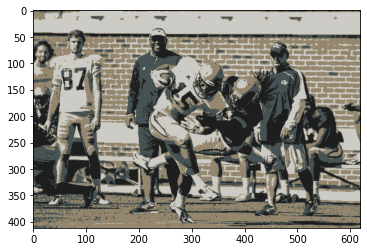

In [215]:
assignments, centroids = k_means_algo_poor_initialization(pixels, 4)
compress_image(centroids, assignments, path)

Total Time:
58.31398892402649
Number of Centroids:
8
Centroids:
[[114. 126.  84.]
 [ 26.  26.  24.]
 [ 54.  67.  75.]
 [162. 112.  88.]
 [220. 225. 228.]
 [185. 164. 138.]
 [106. 122. 143.]
 [190. 189. 187.]]
Number of Iterations: 
82


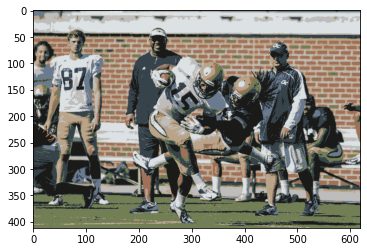

In [216]:
assignments, centroids = k_means_algo_poor_initialization(pixels, 8)
compress_image(centroids, assignments, path)

Question 1.3

In [217]:
def k_means_algo_manhattan(pixels, k):
    
    time_start = time.time()
    assignments = []
    count_dict = defaultdict(int)
    r_dict = defaultdict(int)
    g_dict = defaultdict(int)
    b_dict = defaultdict(int)
    done = 1
    count = 0
    
    # INITIAL CENTER ASSIGNMENT
    def center_assignment(k):
        centroids = np.random.randint(255,size=(k,3))
        return centroids
    
    centroids = center_assignment(k)
    
    # LOOP
    while(done):
        count += 1
        
        # CENTER ASSIGNMENT       
        distances = cdist(pixels, centroids, "cityblock") # use 'cityblock' for Manhattan Distance
        while(np.any(np.isnan(distances))):
            k -= 1
            centroids = center_assignment(k)
            distances = cdist(pixels, centroids, "cityblock")
        assignments = np.array([np.argmin(i) for i in distances])
        
        
        # CENTER ADJUSTMENT
        cent_list = []
        for i in range(k):
            # Set new centroids to the mean of each group
            temporary_centroids = np.round(np.median(pixels[assignments==i],axis=0),decimals=0)                
            cent_list.append(temporary_centroids)
        
        new_centroids = np.vstack(cent_list)
        
        if(np.array_equal(new_centroids,centroids)):
            done = 0
            break
        else:
            centroids = new_centroids
     
    time_end = time.time()
    total_time = time_end - time_start
    
    print("Total Time:")
    print(total_time)
    
    print("Number of Centroids:")
    print(len(centroids))
    
    print("Centroids:")
    print(centroids)
    
    print("Number of Iterations: ")
    print(count)
    
    return(assignments, centroids)

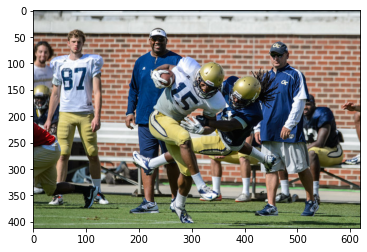

In [233]:
path = 'data/football.bmp'
pixels = process_image(path)

Total Time:
4.9534759521484375
Number of Centroids:
2
Centroids:
[[ 73.  77.  71.]
 [193. 181. 168.]]
Number of Iterations: 
7


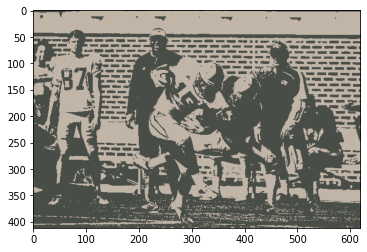

In [219]:
assignments, centroids = k_means_algo_manhattan(pixels, 2)
compress_image(centroids, assignments, path)

Total Time:
13.141013145446777
Number of Centroids:
4
Centroids:
[[185. 167. 151.]
 [117. 113.  87.]
 [217. 220. 222.]
 [ 31.  41.  35.]]
Number of Iterations: 
19


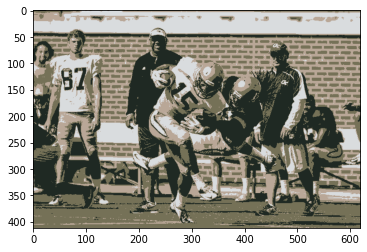

In [220]:
assignments, centroids = k_means_algo_manhattan(pixels, 4)
compress_image(centroids, assignments, path)

Total Time:
7.95776104927063
Number of Centroids:
6
Centroids:
[[124. 123.  90.]
 [ 24.  64. 117.]
 [186. 169. 153.]
 [ 71.  70.  53.]
 [217. 220. 222.]
 [ 21.  23.  20.]]
Number of Iterations: 
11


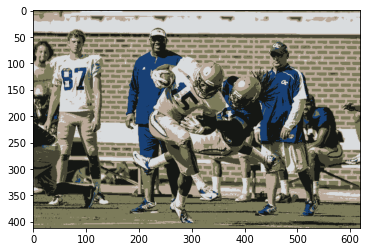

In [221]:
assignments, centroids = k_means_algo_manhattan(pixels, 8)
compress_image(centroids, assignments, path)

Total Time:
23.004103899002075
Number of Centroids:
15
Centroids:
[[ 32.  70. 128.]
 [137. 145. 153.]
 [109. 128.  78.]
 [124. 147.  93.]
 [223. 227. 227.]
 [195. 181. 164.]
 [185. 158. 139.]
 [198. 203. 208.]
 [ 16.  17.  15.]
 [ 11.  42.  79.]
 [156. 102.  80.]
 [ 99. 111. 120.]
 [171. 130. 108.]
 [ 52.  50.  35.]
 [ 81.  81.  63.]]
Number of Iterations: 
32


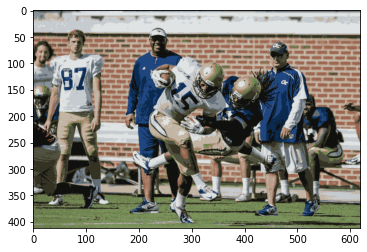

In [222]:
assignments, centroids = k_means_algo_manhattan(pixels, 16)
compress_image(centroids, assignments, path)

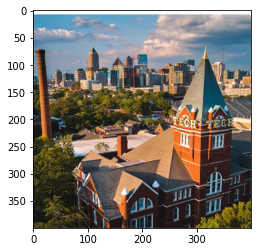

In [223]:
path = 'data/GeorgiaTech.bmp'
pixels = process_image(path)

Total Time:
2.574738025665283
Number of Centroids:
2
Centroids:
[[166. 159. 166.]
 [ 51.  52.  34.]]
Number of Iterations: 
6


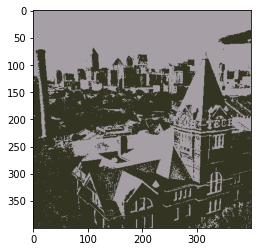

In [224]:
assignments, centroids = k_means_algo_manhattan(pixels, 2)
compress_image(centroids, assignments, path)

Total Time:
8.563006162643433
Number of Centroids:
4
Centroids:
[[136. 157. 175.]
 [ 96.  90.  76.]
 [222. 173. 139.]
 [ 38.  34.  27.]]
Number of Iterations: 
20


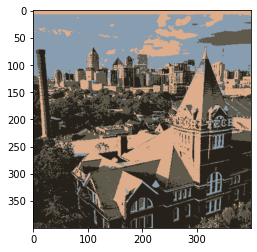

In [225]:
assignments, centroids = k_means_algo_manhattan(pixels, 4)
compress_image(centroids, assignments, path)

Total Time:
7.886839151382446
Number of Centroids:
8
Centroids:
[[ 95. 101. 100.]
 [ 56.  59.  62.]
 [ 35.  28.  24.]
 [207. 181. 173.]
 [211. 146.  96.]
 [131. 156. 177.]
 [255. 255. 255.]
 [111.  87.  34.]]
Number of Iterations: 
18


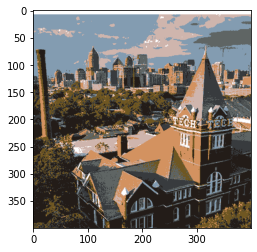

In [226]:
assignments, centroids = k_means_algo_manhattan(pixels, 8)
compress_image(centroids, assignments, path)

Total Time:
16.86366105079651
Number of Centroids:
10
Centroids:
[[ 79.  65.  30.]
 [255. 255. 255.]
 [ 93. 135. 161.]
 [ 34.  28.  24.]
 [101.  92.  88.]
 [ 44.  59.  68.]
 [218. 188. 175.]
 [207. 155. 110.]
 [163. 115.  43.]
 [144. 163. 180.]]
Number of Iterations: 
38


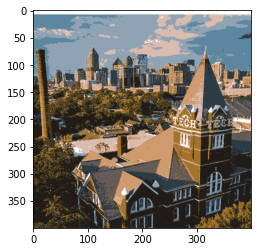

In [227]:
assignments, centroids = k_means_algo_manhattan(pixels, 16)
compress_image(centroids, assignments, path)

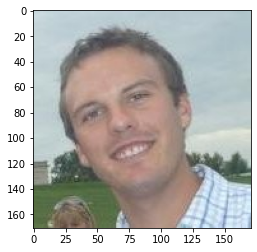

In [228]:
path = 'data/tom.bmp'
pixels = process_image(path)

Total Time:
0.859407901763916
Number of Centroids:
2
Centroids:
[[134. 130. 130.]
 [206. 206. 203.]]
Number of Iterations: 
8


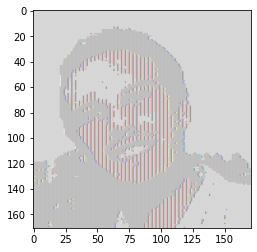

In [229]:
assignments, centroids = k_means_algo_manhattan(pixels, 2)
compress_image(centroids, assignments, path)

Total Time:
0.9685938358306885
Number of Centroids:
4
Centroids:
[[255. 175. 151.]
 [119. 112. 131.]
 [194. 203. 255.]
 [145. 255. 178.]]
Number of Iterations: 
9


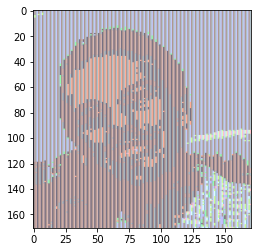

In [230]:
assignments, centroids = k_means_algo_manhattan(pixels, 4)
compress_image(centroids, assignments, path)

Total Time:
2.3598930835723877
Number of Centroids:
8
Centroids:
[[143. 132. 255.]
 [198. 206. 255.]
 [106.  92. 255.]
 [133. 118. 111.]
 [117. 255. 142.]
 [206. 255. 191.]
 [255. 148. 131.]
 [255. 191. 201.]]
Number of Iterations: 
22


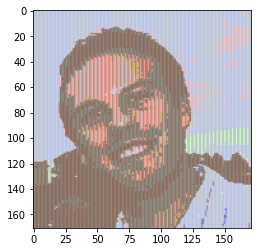

In [231]:
assignments, centroids = k_means_algo_manhattan(pixels, 8)
compress_image(centroids, assignments, path)

Total Time:
2.650786876678467
Number of Centroids:
13
Centroids:
[[208. 255. 189.]
 [151. 141. 255.]
 [255. 143. 126.]
 [128. 120. 255.]
 [130. 255. 168.]
 [255. 191. 203.]
 [ 85. 255.  93.]
 [255.  89. 100.]
 [101.  83. 255.]
 [ 94. 104.  87.]
 [166. 140. 130.]
 [255. 178. 150.]
 [198. 206. 255.]]
Number of Iterations: 
24


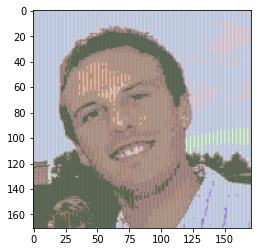

In [232]:
assignments, centroids = k_means_algo_manhattan(pixels, 16)
compress_image(centroids, assignments, path)